# Demonstrate FFT padding and windowing


Since the FFT is much faster for powers of 2, we often have to "pad" our data (fill it with a constant value) to satisfy that. This is also used in other applications like image processing. 

However, this is mathematically equivalent to multiplying a function by a step function, which induces characteristic "ringing" effects. "Windowing" the input transform can reduce this ringing (at the expense of loss of information on the boundaries of the input waveform). 

Thought question: If you window, transform, transform back, and reverse the window, what should occur? You'll explore this in your HW assignments. 

In [1]:
import matplotlib.pyplot as plt

from fft import fft, fft_power
import numpy as np
import math

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 90

## Simple Sine Wave

In this example, since it is a simple sine wave, it goes on forever. So, in our case, to demonstrate what is happening we will clip off a certain number of entries (see the "clip" variable). 

To check the effect of windowing, set the "window" variable to "True". 

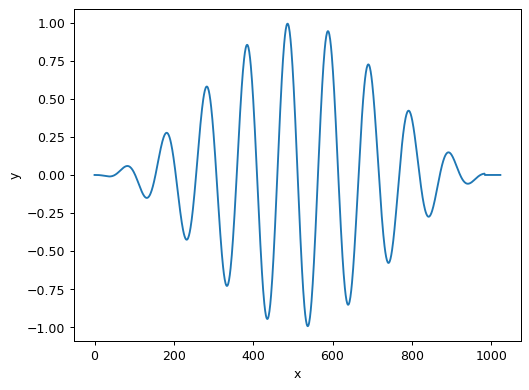

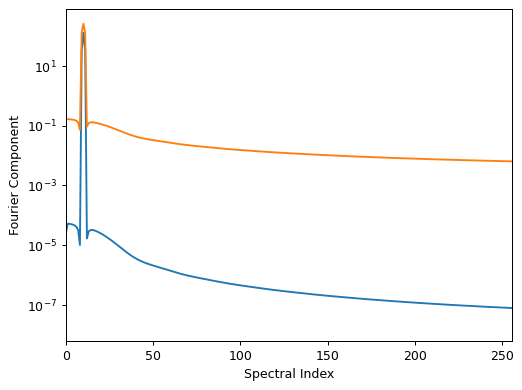

In [3]:
N = 1024 # number of samples
f = 10.0 # frequency / N
m = 0.   # linear slope, if desired

# For demonstrations : 
clip = 40       # "clip" so we can pad with zeros
window = True # apply a window
    
x = np.arange(N) 
if window:
    y = np.sin( -2. * np.pi * f /N * x ) * (0.5 - 0.5 * np.cos(2*math.pi*x/float(N-1))) + m*x
else:
    y = np.sin( -2. * np.pi * f /N * x ) 
    
    
y[N-clip: N] = 0.

Y = fft(y)  # Our FFT implementation
Ynp = np.fft.fft(y) # Numpy's FFT implementation
Y_abs = abs(Y)
Ynp_abs = abs(Y)


powery = fft_power(Y)
powerx = np.arange( len(powery) )

Y_abs = abs(Y)

f1 = plt.figure(1)
plt.plot( x, y )
plt.xlabel("x")
plt.ylabel("y")

f2 = plt.figure(2)
plt.plot( powerx, powery, label="Power" )
plt.plot( x, Y_abs, label="Magnitude" )
plt.xlim([0,N/4])
plt.yscale('log')
plt.xlabel("Spectral Index")
plt.ylabel("Fourier Component")
plt.show()


## CO$_2$ Data

These are real data, but are not a power of 2. In this case, we need to pad the input distribution. You can check the effect of windowing with the "window" method. 

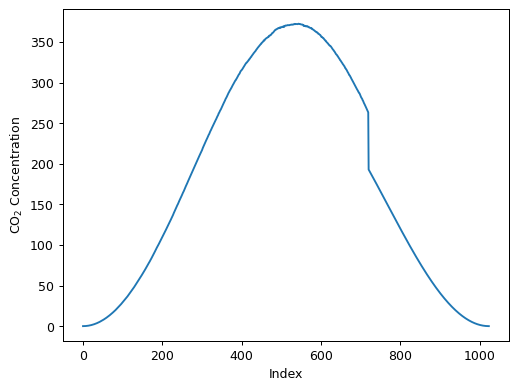

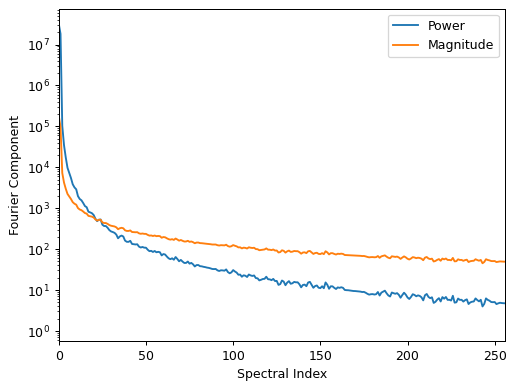

In [4]:
from read_co2 import read_co2
import math

window = True

# Read like previous example with CO2 data
x,y = read_co2('co2_mm_mlo.txt')
y_valid = y >= 0.
y = y[y_valid]

# instead of truncating, pad with values

N = len(y)
log2N = math.log(N, 2)
next_pow_of_2 = int(log2N) + 1
if log2N - int(log2N) > 0.0 :    
    ypads = np.full( 2**( next_pow_of_2) - N, 300, dtype=np.double)
    y = np.concatenate( (y, ypads) )
    # CAREFUL: When you pad, the x axis becomes somewhat "meaningless" for the padded values, 
    # so typically it is best to just consider it an index
    x = np.arange(len(y))
    N = len(y)
    # Apply a window to reduce ringing from the 2^n cutoff
    if window : 
        y = y * (0.5 - 0.5 * np.cos(2*np.pi*x/(N-1)))
                

Y = fft(y)
Y_abs = abs(Y)
powery = fft_power(Y)
powerx = np.arange(powery.size)

f1 = plt.figure(1)
plt.plot( x, y )
plt.xlabel("Index")
plt.ylabel("CO$_2$ Concentration")

f2 = plt.figure(2)
plt.plot( powerx, powery, label="Power" )
plt.plot( x, Y_abs, label="Magnitude" )
plt.xlim([0,N/4])
plt.legend()
plt.yscale('log')
plt.xlabel("Spectral Index")
plt.ylabel("Fourier Component")

plt.show()

